# Principal Component Analysis (PCA)

## Imports

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import linalg
import seaborn as sns

sys.path.append('../')

from utils.scalers import  MinMaxScaler

sns.set_palette('tab10')

## Process

In [3]:
# Reading the dataset
data = np.genfromtxt('./data/penguins.csv', delimiter=',')
X = data[:, :-1]
y = data[:, -1]
print('Shape:', data.shape)
data[:3, :]

Shape: (333, 5)


array([[  39.1,   18.7,  181. , 3750. ,    0. ],
       [  39.5,   17.4,  186. , 3800. ,    0. ],
       [  40.3,   18. ,  195. , 3250. ,    0. ]])

In [4]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_norm

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.63636364, 0.60714286, 0.3559322 , 0.29861111],
       [0.68      , 0.70238095, 0.6440678 , 0.38888889],
       [0.65818182, 0.66666667, 0.44067797, 0.29861111]])

In [5]:
class MyPCA():

    def __init__(self, n_components):
        self.n_components = n_components


    def get_cov_matrix(self, X):
        mu = np.mean(X, axis=0)
        return ((X-mu).T @ (X-mu)) / (X.shape[0]-1)   


    def fit(self, X):
        self.X = X
        self.sigma = self.get_cov_matrix(self.X)

        U, S, V =  np.linalg.svd(self.sigma)
        
        self.P = U.T[:self.n_components]
        self.explained_variance_ = S[:self.n_components]
        self.explained_variance_ratio = S[:self.n_components] / S.sum()

    def transform(self, X):
        self.means = X.mean(axis=0)
        return (self.P @ (X - self.means).T).T

    def fit_transform(self, X):
        self.fit(X)
        self.transform(X)

    def inverse_transform(self, Z):
        print(self.P.T.shape)
        print(Z.T.shape)

        print(self.means.reshape(-1, 1))
        return (self.P.T @ Z.T).T + self.means

In [6]:
my_pca = MyPCA(2)
my_pca.fit(X_norm)
Z = my_pca.transform(X_norm)
Z[:3, :]

array([[ 4.22113052e-01, -3.16289678e-04],
       [ 2.89847870e-01,  1.09060918e-01],
       [ 3.00277286e-01,  4.85488190e-02]])

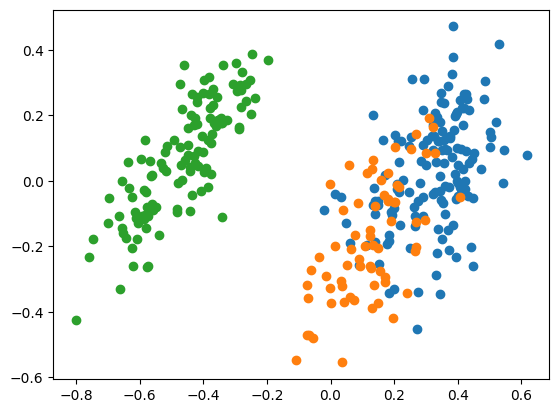

In [7]:
plt.scatter(x=Z[y == 0, 0], y=Z[y == 0, 1])
plt.scatter(x=Z[y == 1, 0], y=Z[y == 1, 1])
plt.scatter(x=Z[y == 2, 0], y=Z[y == 2, 1])
plt.show()

In [8]:
for n_components in range(1,5):
    my_pca = MyPCA(n_components)
    my_pca.fit(X_norm)
    
    print('--------------------------------------------------')
    print(f'PCA with {n_components} components')
    print('--------------------------------------------------')
    for i, (ev, evr) in enumerate(zip(my_pca.explained_variance_, my_pca.explained_variance_ratio)):
        print(f'Explained variance of component {i+1}: {ev:.4f} ({evr*100:.2f}%)')
    ev_total = np.sum(my_pca.explained_variance_)
    evr_total = np.sum(my_pca.explained_variance_ratio)
    
    print('__________________________________________________')
    print(f'Explained variable total: {ev_total:.4f} ({evr_total*100:.2f}%)')
    print('--------------------------------------------------\n')

--------------------------------------------------
PCA with 1 components
--------------------------------------------------
Explained variance of component 1: 0.1399 (69.63%)
__________________________________________________
Explained variable total: 0.1399 (69.63%)
--------------------------------------------------

--------------------------------------------------
PCA with 2 components
--------------------------------------------------
Explained variance of component 1: 0.1399 (69.63%)
Explained variance of component 2: 0.0385 (19.17%)
__________________________________________________
Explained variable total: 0.1784 (88.79%)
--------------------------------------------------

--------------------------------------------------
PCA with 3 components
--------------------------------------------------
Explained variance of component 1: 0.1399 (69.63%)
Explained variance of component 2: 0.0385 (19.17%)
Explained variance of component 3: 0.0167 (8.33%)
_________________________________

## Sklearn

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(2)
pca.fit(X_norm)
Z = pca.transform(X_norm)
Z[:3, :]

array([[-4.22113052e-01,  3.16289678e-04],
       [-2.89847870e-01, -1.09060918e-01],
       [-3.00277286e-01, -4.85488190e-02]])

Inverse signs

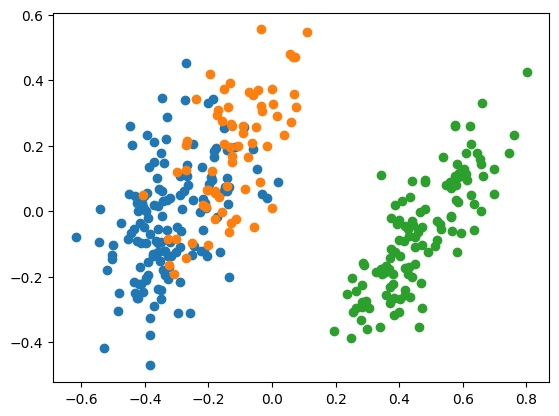

In [11]:
plt.scatter(x=Z[y == 0, 0], y=Z[y == 0, 1])
plt.scatter(x=Z[y == 1, 0], y=Z[y == 1, 1])
plt.scatter(x=Z[y == 2, 0], y=Z[y == 2, 1])
plt.show()

In [12]:
for n_components in range(1,5):
    pca = PCA(n_components)
    pca.fit(X_norm)
    
    print('--------------------------------------------------')
    print(f'PCA with {n_components} components')
    print('--------------------------------------------------')
    for i, (ev, evr) in enumerate(zip(pca.explained_variance_, pca.explained_variance_ratio_)):
        print(f'Explained variance of component {i+1}: {ev:.4f} ({evr*100:.2f}%)')
    ev_total = np.sum(pca.explained_variance_)
    evr_total = np.sum(pca.explained_variance_ratio_)
    
    print('__________________________________________________')
    print(f'Explained variable total: {ev_total:.4f} ({evr_total*100:.2f}%)')
    print('--------------------------------------------------\n')

--------------------------------------------------
PCA with 1 components
--------------------------------------------------
Explained variance of component 1: 0.1399 (69.63%)
__________________________________________________
Explained variable total: 0.1399 (69.63%)
--------------------------------------------------

--------------------------------------------------
PCA with 2 components
--------------------------------------------------
Explained variance of component 1: 0.1399 (69.63%)
Explained variance of component 2: 0.0385 (19.17%)
__________________________________________________
Explained variable total: 0.1784 (88.79%)
--------------------------------------------------

--------------------------------------------------
PCA with 3 components
--------------------------------------------------
Explained variance of component 1: 0.1399 (69.63%)
Explained variance of component 2: 0.0385 (19.17%)
Explained variance of component 3: 0.0167 (8.33%)
_________________________________